In [26]:
from qiskit import __version__
print (__version__)

2.3.0


In [27]:
import numpy as np
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
print(ket0/2 + ket1 /2)

[[0.5]
 [0.5]]


In [28]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1/2 + M2/2
print(M) 

[[1.  0.5]
 [0.  0.5]]


In [29]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [30]:
from qiskit.visualization import array_to_latex

display(array_to_latex(np.matmul(M1,ket1 )))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
from qiskit.quantum_info import Statevector

u = Statevector([1/np.sqrt(2),1/ np.sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w= Statevector([1/3,2/3])

display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

display(u.is_valid())
display(w.is_valid())
display(v.draw("latex"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


True

False

<IPython.core.display.Latex object>

In [32]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))


Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

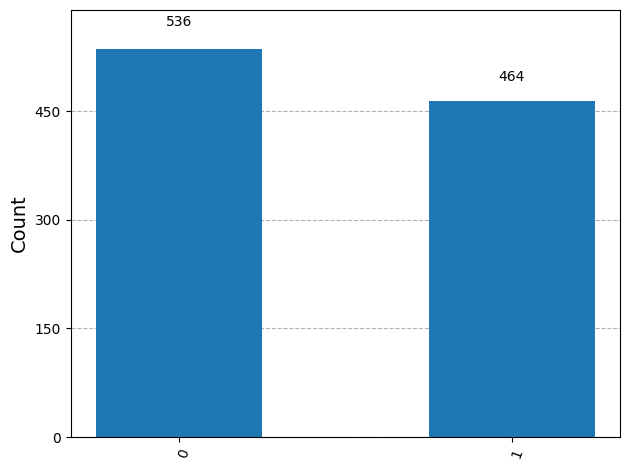

In [33]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [34]:
from qiskit.quantum_info import Operator
Y = Operator([[0, -1.0j], [1.0j, 0]])
H= Operator([[1/np.sqrt(2), 1/np.sqrt(2)], [1/np.sqrt(2), -1/np.sqrt(2)]])
S= Operator([[1, 0], [0, 1.0j]])
T= Operator([[1, 0], [0, (1+1.0j)/np.sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [35]:
#We can apply a unitary operation to a state vector using the evolve method.
v = Statevector([1,0])

v= v.evolve(H)
v= v.evolve(T)
v= v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))


<IPython.core.display.Latex object>

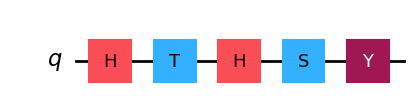

In [36]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

display(circuit.draw(output="mpl"))

In [37]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [38]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

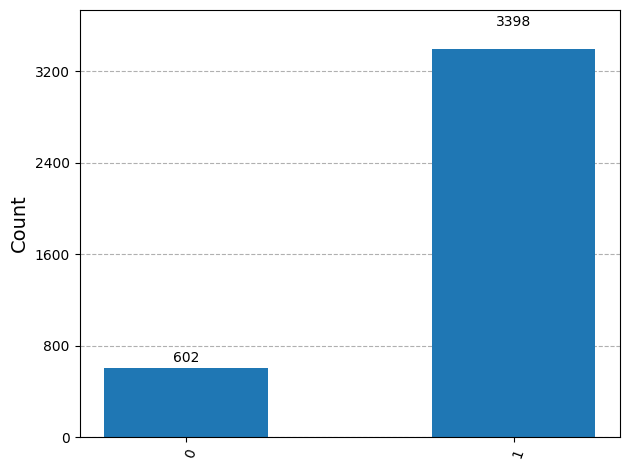

In [39]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))